<font color="#483D8B">
<h1 align="center"> One Way Annova Test</h1>
<h3 align="center"> Evan Ditter </h3>
<h3 align="center">February 15th, 2019</h3>
</font>

## Overview 

Lab 3 analyzes the one-way ANOVA test on random data. 

The definitions of an ANOVA test, F-test, F-statistic, and Bonferroni correction are given complimentary to the results analyzed. Tukey's test is explained for what circumstances it should be used in. 

The code used and statistic measures used are in the references below.

**References**:

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html

http://statisticsbyjim.com/anova/f-tests-anova/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Data 

### Definitions 

**ANOVA test** - The ANOVA test uses F-tests to assess the equality of means given three or more groups, or in other words to test whether there is any statiscally significant differences between means of three or more groups. The test works so you go through several calculations to arrive at a test statistic and then you compare the test statistic to a critical value based on a probability distribution. In the case of the ANOVA, you use the "f-distribution".

**F-test** - An F-test is a statistcal test in which the test statistic has an F-distribution for the null hypothesis. F-tests use the F-statistic as the name implies. F-tests in One-Way ANOVA use an F-statistic that is the variance between-groups divided by the variance within groups. See F-statistic for a definition on that.

**F-statistic** - An F-statistic is the ratio of two variances. Variances in turn measure the dispersal of data points around the mean. Higher variances occur because of individual data points that will tend to be further from the mean. The square root of a variance is the standard deviation which can be easier to interpret. F-statistic therefore are taking the ratio of two mean squares where mean squares are the variances that account for degrees of freedom. 

**Bonferroni Correction** - The Bonferroni correction is an approach to account for multiple comparisons that would otherwise end up rejecting the results as significant when they may actually be significant. In general, if multiple hyptheses are tested, the chances of a rare event increases which in turn increases the likelihood of incorrectly rejecting a null hypothesis. The Bonferroni correction takes the alpha value and divides by the total number of null hypotheses to get a new p-value.

**Tukey's Test** - Tukey's test compares all possible pairs of means and can be used in conjunction with an ANOVA test. The output from Tukey's test will show the average difference and confidence interval for each group. If groups do not overlap in the confidence interval, it will be okay to reject the null hypothesis. 

In [5]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

The data above creates a random distribution of voters based on race and age. This data will be used in the exploratory data analysis section where a One-Way ANOVA test will be applied to it.

## Exploratory Data Analysis 


In [9]:
# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

Here the One-Way ANOVA test was run on the data which yielded an F-statistic of 1.774 and a p-value of 0.1317, indicating that there is no significant difference between the means of each group. The closer that the F-statistic and p-value are the less of a significance there is. With a p-value of 0.1317 and an F-statistic of 1.774, there is not a significant difference between the between-group variance and the within-group variance. 

Now, data representing new age data where the group means do differ will be created with a second ANOVA test applied:

In [6]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

The test result suggests the groups don't have the same sample means in this case, since the p-value is significant at a 99% confidence level. The F-statistic had a value of 10.165 and a p-value that was essentially 0. This means there was a significant difference between the between-group variance and the within-group variance. We know that it is the white voters who differ because we set it up that way in the code, but when testing real data, you may not know which group(s) caused the the test to throw a positive result. To check which groups differ after getting a positive ANOVA result, you can perform a follow up test or "post-hoc test".

One post-hoc test is to perform a separate t-test for each pair of groups. In the data section, Tukey's Test and the Bonferroni correction were mentioned. We will use those later, but for now we will perform a t-test between all pairs using by running each pair through the stats.ttest_ind() we covered in the lesson on t-tests:

In [7]:
# Get all race pairs
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]]))    

asian black
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)
asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)
asian other
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095151)
asian white
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)
black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)
black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
black white
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)
hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)
other white
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593065)


The p-values for each pairwise t-test suggest mean of white voters is likely different from the other groups, since the p-values for each t-test involving the white group is below 0.05. Using unadjusted pairwise t-tests can overestimate significance, however, because the more comparisons you make, the more likely you are to come across an unlikely result due to chance. We can adjust for this multiple comparison problem by dividing the statistical significance level by the number of comparisons made. In this case, if we were looking for a significance level of 5%, we'd be looking for p-values of 0.05/10 = 0.005 or less. This simple adjustment for multiple comparisons is known as the Bonferroni correction as described earlier.

Next, we will try using another common post hoc-test in the Tukey test. Tukey's test will be of good use here to see when we can reject the null hypothesis and if a specific group creates a much higher between-group variance. You can carry out Tukey's test using the pairwise_tukeyhsd() function in the statsmodels.stats.multicomp library:

group1,group2,meandiff,lower,upper,reject
asian,black,-0.8032,-3.4423,1.836,False
asian,hispanic,0.4143,-2.1011,2.9297,False
asian,other,-1.0645,-4.2391,2.11,False
asian,white,1.9547,-0.4575,4.3668,False
black,hispanic,1.2175,-0.386,2.821,False
black,other,-0.2614,-2.7757,2.253,False
black,white,2.7579,1.3217,4.194,True
hispanic,other,-1.4789,-3.863,0.9053,False
hispanic,white,1.5404,0.3468,2.734,True
other,white,3.0192,0.7443,5.2941,True


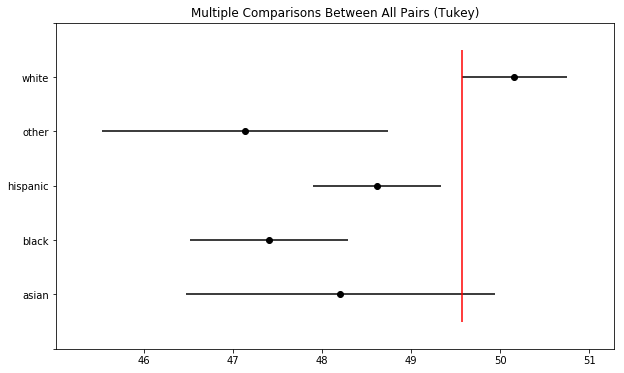

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

The output of the Tukey test shows the average difference, a confidence interval as well as whether you should reject the null hypothesis for each pair of groups at the given significance level. In this case, the test suggests we reject the null hypothesis for 3 pairs, with each pair including the "white" category. This suggests the white group is likely different from the others. The 95% confidence interval plot reinforces the results visually: only 1 other group's confidence interval overlaps the white group's confidence interval. This reinforces our initial suspicions from the group of t-tests we performed where the p-values with the white's group were all under 0.05.

## Conclusions
The One-Way ANOVA test has allowed us to check three or more groups (in this case 5) to see if there is any statistical difference according to the levels of a categorical variable. We used Python's scripy library to perform the ANOVA test and performed different post hoc-tests including t-tests between each group, using the Bonferroni correction on the initial ANOVA test, and performing Tukey's test on data we knew to have a group with a significantly different mean. Tukey's test confirmed the results from the t-tests that there was an outlier group in terms of having a mean that was significantly different than the other groups. 
